In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
# define path
data_path = '/content/CarPricesPrediction.csv'

# read data from csv file
df_hr = pd.read_csv(data_path)

df_hr

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


In [ ]:
df_hr.drop(columns=["Unnamed: 0"], inplace=True)
df_hr.head(10)

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
5,Ford,Silverado,2013,23600,Excellent,27820.00
6,Toyota,Altima,2014,11470,Excellent,27426.60
7,Chevrolet,Silverado,2015,89471,Good,22526.55
8,Ford,Camry,2014,121298,Good,21935.10
9,Ford,Altima,2016,110691,Excellent,20465.45


In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
df_hr["Condition"].unique()

array(['Excellent', 'Good', 'Fair'], dtype=object)

In [ ]:
df_hr["Model"].unique()

array(['Silverado', 'Civic', 'Altima', 'Camry', 'F-150'], dtype=object)

**Visualization**

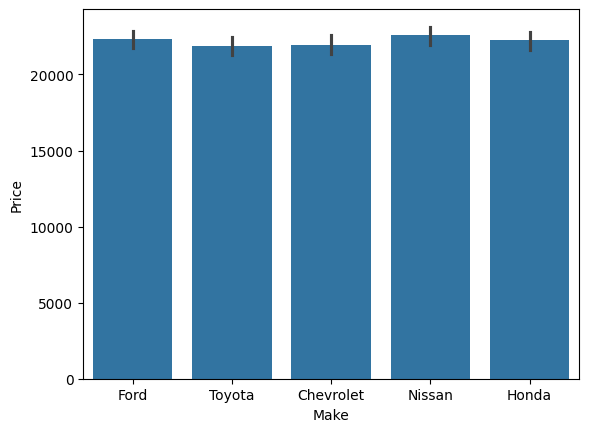

In [ ]:
sns.barplot(data=df_hr, x="Make", y="Price")
plt.show()

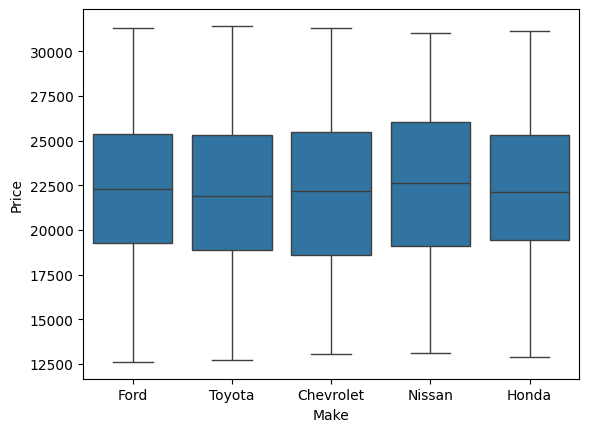

In [ ]:
sns.boxplot(data=df_hr, x="Make", y="Price")
plt.show()

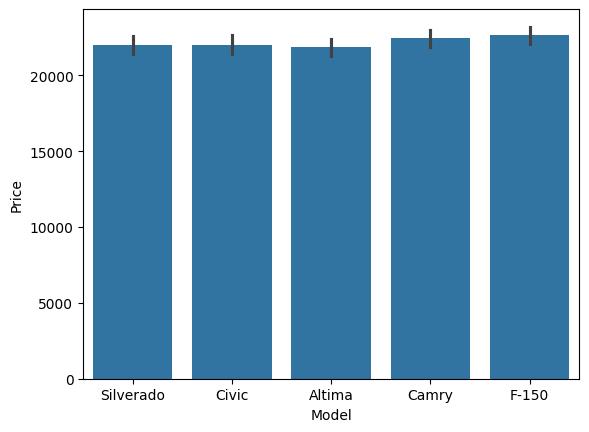

In [ ]:
sns.barplot(data=df_hr, x="Model", y="Price")
plt.show()

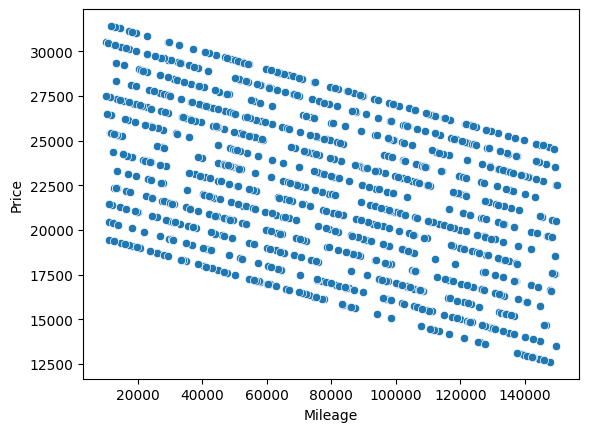

In [ ]:
sns.scatterplot(data=df_hr, x="Mileage", y="Price")
plt.show()


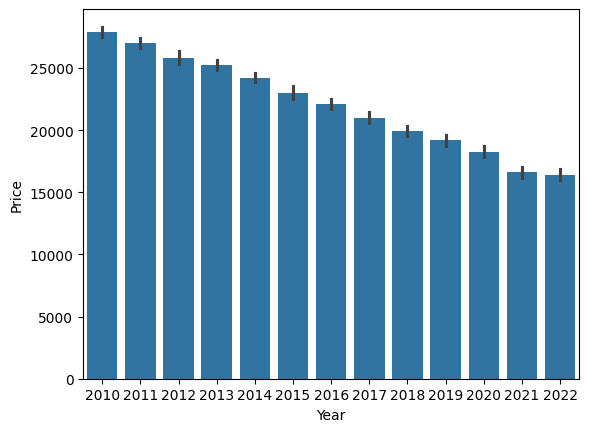

In [ ]:
sns.barplot(data=df_hr, x="Year", y="Price")
plt.show()

**Categorical features**

In [ ]:
df_hr["Condition"] = df_hr["Condition"].map({
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
})

df_hr = pd.get_dummies(df_hr) # this will encode Make & Model features
df_hr.head(5)

,Year,Mileage,Condition,Price,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado
0,2022,18107,3,19094.75,0,1,0,0,0,0,0,0,0,1
1,2014,13578,3,27321.10,0,0,0,0,1,0,0,0,0,1
2,2016,46054,2,23697.30,1,0,0,0,0,0,0,1,0,0
3,2022,34981,3,18251.05,0,1,0,0,0,0,0,1,0,0
4,2019,63565,3,19821.85,1,0,0,0,0,0,0,1,0,0


**Spliting into x & y**

In [ ]:
X = df_hr.drop(columns="Price")
y = df_hr["Price"]

**Split training and train data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest**

In [ ]:
reg = RandomForestRegressor(n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 2, 3, 4, 5]
}

gscv = GridSearchCV(reg, param_grid, cv=5, scoring="neg_mean_squared_error")
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred = gscv.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: \t", mae)
print("MSE: \t", mse)
print("RMSE: \t", rmse)
print("R2: \t", r2)

MAE: 	 94.34276999999933
MSE: 	 17316.046597712684
RMSE: 	 131.5904502527166
R2: 	 0.9991454422530609


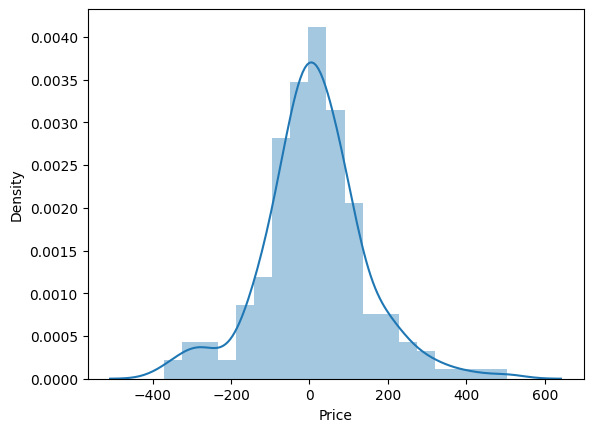

In [ ]:
sns.distplot(y_test - y_pred)
plt.show()